In [1]:
import pandas as pd
import numpy as np
import shap
import xgboost
import os
from xgboost import plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error, f1_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.impute import SimpleImputer


sns.set() # setting seaborn default for plots
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
c:\users\jh\.conda\envs\ispin\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
class XGBCLASS:
    def __init__(self,train_file='./train.csv',test_file='./test.csv'):
        
        #data
        self.train_data=pd.read_csv(train_file)
        self.test_data=pd.read_csv(test_file)
        self.train_data.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
        self.test_data.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
        self.y= self.train_data['Recurrence']
        self.X = self.train_data.drop(['Recurrence'],axis=1)
        self.train_X, self.val_X, self.train_y, self.val_y = train_test_split(self.X, self.y, test_size=0.1, shuffle=True, random_state=1)
        self.test_X =self.test_data.drop(['Recurrence'],axis=1)
        self.test_y =self.test_data['Recurrence']
        
        
        self.pred=[]
        
        #params
        self.params={
            'learning_rate':0.1,
            'n_estimators':1000,
            'max_depth':5,
            'min_child_weight':1,
            'gamma':0,
            'subsample':0.8,
            'colsample_bytree':0.8,
            'objective':'binary:logistic',
            'nthread':-1,
            'scale_pos_weight':1,
            'seed':2019,
            'reg_alpha':1e-5
        }
        self.model=xgboost.XGBClassifier(
            learning_rate =self.params['learning_rate'],
            n_estimators=self.params['n_estimators'],
            max_depth=self.params['max_depth'],
            min_child_weight=self.params['min_child_weight'],
            gamma=self.params['gamma'],
            subsample=self.params['subsample'],
            colsample_bytree=self.params['colsample_bytree'],
            objective= self.params['objective'],
            nthread=self.params['nthread'],
            scale_pos_weight=self.params['scale_pos_weight'],
            seed=self.params['seed']
        )
    
    def set_model(self):
        self.model=xgboost.XGBClassifier(
            learning_rate =self.params['learning_rate'],
            n_estimators=self.params['n_estimators'],
            max_depth=self.params['max_depth'],
            min_child_weight=self.params['min_child_weight'],
            gamma=self.params['gamma'],
            subsample=self.params['subsample'],
            colsample_bytree=self.params['colsample_bytree'],
            objective= self.params['objective'],
            nthread=self.params['nthread'],
            scale_pos_weight=self.params['scale_pos_weight'],
            seed=self.params['seed']
        )

    def test(self,y,pred):
        rmse=np.sqrt(mean_squared_error(y,pred))
        print('RMSE: %f' %(rmse))
        print('Accuracy_score: ', metrics.accuracy_score(y,pred))
        print('F-score:',f1_score(y,pred))
        
    def model_fit(self):
        self.model.fit(self.train_X,self.train_y)
        val_preds=self.model.predict(self.val_X)
        test_preds=self.model.predict(self.test_X)
        self.pred=[val_preds,test_preds]
        print("평가 데이터 Acc:")
        self.test(self.val_y,val_preds)
        print("시험 데이터 Acc:")
        self.test(self.test_y,test_preds)
        
#         return val_preds, test_preds
    
    def tuning_param(self,xgb_param_grid):
        hr_grid = GridSearchCV(estimator=self.model,
                               param_grid=xgb_param_grid,
                               scoring='accuracy',
                               n_jobs=32,
                               cv=5,
                               refit=True, 
                               verbose=10,
                               return_train_score=True)
        hr_grid.fit(self.train_X,self.train_y)
        # print(hr_grid.cv_results_, hr_grid.best_params_, hr_grid.best_score_)
        print("최고의 파라미터",hr_grid.best_params_, hr_grid.best_score_)

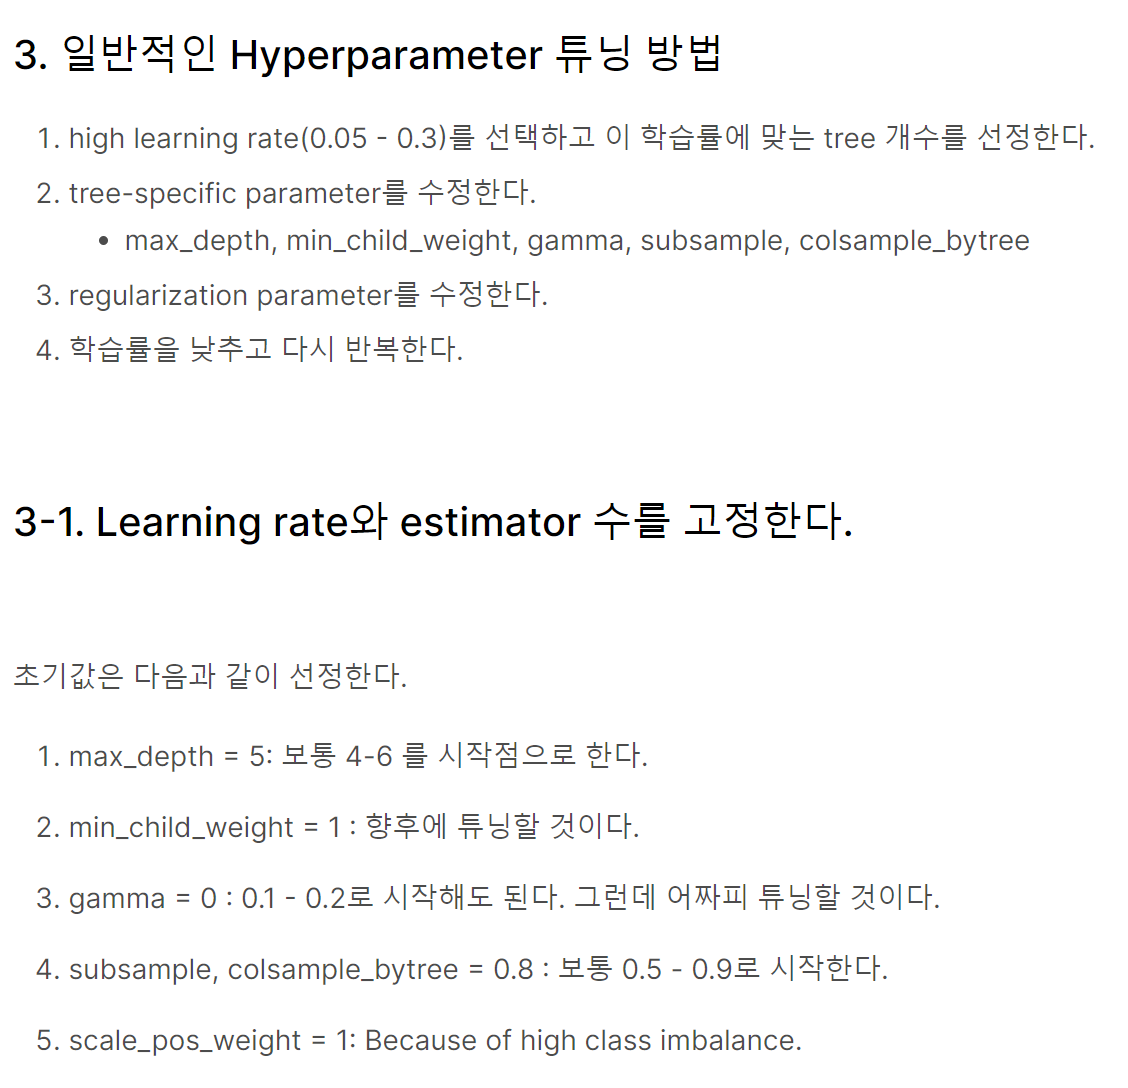

In [3]:
xgb_model=XGBCLASS()
xgb_model.model_fit()


평가 데이터 Acc:
RMSE: 0.411272
Accuracy_score:  0.8308550185873605
F-score: 0.4417177914110429
시험 데이터 Acc:
RMSE: 0.591608
Accuracy_score:  0.65
F-score: 0.5205479452054794


In [4]:
# 초모수 격자생성
#xgb_param_grid = {'max_depth':range(3,10,3),'min_child_weight':range(1,6,2)}
# Create a GridSearchCV object
#xgb_model.set_model()
#xgb_model.tuning_param(xgb_param_grid)

In [5]:
#xgb_model.params['max_depth']=9
#xgb_model.params['min_child_weight']=1

# 초모수 격자생성
#xgb_param_grid = {'gamma':[i/10.0 for i in range(0,5)]}
# Create a GridSearchCV object
#xgb_model.set_model()
#xgb_model.tuning_param(xgb_param_grid)


In [6]:
#xgb_model.params['gamma']=0.3

# 초모수 격자생성
#xgb_param_grid = {'subsample':[i/10.0 for i in range(6,10)],
# 'colsample_bytree':[i/10.0 for i in range(6,10)]}
# Create a GridSearchCV object
#xgb_model.set_model()
#xgb_model.tuning_param(xgb_param_grid)

In [7]:
#xgb_model.params['colsample_bytree']=0.8
#xgb_model.params['subsample']=0.9
# 초모수 격자생성
#xgb_param_grid = { 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
# Create a GridSearchCV object
#xgb_model.set_model()
#xgb_model.tuning_param(xgb_param_grid)

In [8]:
#xgb_model.params['reg_alpha']=1
#xgb_model.set_model()
#xgb_model.model_fit()

#xgb_model.params['learning_rate']=0.01
#xgb_model.set_model()
#xgb_model.model_fit()


In [9]:
xgb_model.params['n_estimators']=1000
xgb_model.params['learning_rate']=0.01
xgb_model.params['reg_alpha']=1e-05
xgb_model.params['colsample_bytree']=0.6
xgb_model.params['subsample']=0.9
xgb_model.params['gamma']=0.4
xgb_model.params['max_depth']=9
xgb_model.params['min_child_weight']=1


xgb_model.set_model()
xgb_model.model_fit()

평가 데이터 Acc:
RMSE: 0.417997
Accuracy_score:  0.8252788104089219
F-score: 0.3896103896103896
시험 데이터 Acc:
RMSE: 0.565685
Accuracy_score:  0.68
F-score: 0.5428571428571428


In [10]:
shap.initjs()
explainer=shap.TreeExplainer(xgb_model.model)
shap_values=explainer.shap_values(xgb_model.train_X)

In [11]:
xgb_model.train_X.head()

,Age,Gender,hospital_stay,BMI,Prev._Abd_OP_history,preop_RT,Preop_stent,CEA,CA19-9,Duration_of_op,...,number_of_total_positive_lymph_node,number_of_harvested_lymph_node,Distant_metastasis,Histologis_classification,Differentiation,LVI,neural_invasion,Postop_RT,Postop_chemotherapy,Type_of_Chemotherapy
2661,76,1,6.0,25.2,0,0,0,0.5,1.4,110.0,...,0.0,9.0,0,1.0,2,0,0,0.0,0.0,0.0
2989,58,2,8.0,21.6,0,1,0,1.7,19.0,150.0,...,0.0,11.0,0,1.0,1,0,0,0.0,1.0,2.0
1005,60,1,8.0,25.5,0,0,0,1.2,9.0,165.0,...,0.0,18.0,0,1.0,2,0,0,0.0,0.0,0.0
1235,79,2,9.0,25.1,0,0,0,6.5,46.8,240.0,...,0.0,13.0,0,1.0,2,0,0,0.0,1.0,2.0
4292,71,1,9.0,26.7,0,0,0,6.1,36.0,180.0,...,0.0,13.0,0,1.0,2,0,1,0.0,1.0,2.0


In [12]:
xgb_model.train_y[4402]

1

In [13]:
xgb_model.train_X.iloc[4402,:]

Age                                          63.0
Gender                                        2.0
hospital_stay                                 5.0
BMI                                          20.5
Prev._Abd_OP_history                          0.0
preop_RT                                      0.0
Preop_stent                                   0.0
CEA                                           1.8
CA19-9                                        2.8
Duration_of_op                               60.0
Emergency                                     0.0
Intraoperative_Transfusion                    0.0
Operation                                     5.0
Type_of_operation                             1.0
Site_of_tumor(complex)                        8.0
Site_of_tumor(simple)                         1.0
Perforation                                   0.0
Fistula                                       0.0
Combined_resection                            0.0
Colonic_obstruction                           0.0


In [14]:
xgb_model.train_y[259]

0

In [15]:
shap.force_plot(explainer.expected_value,shap_values[0,:],xgb_model.train_X.iloc[259,:])

In [16]:
shap.force_plot(explainer.expected_value,shap_values[4402,:],xgb_model.train_X.iloc[4402,:])

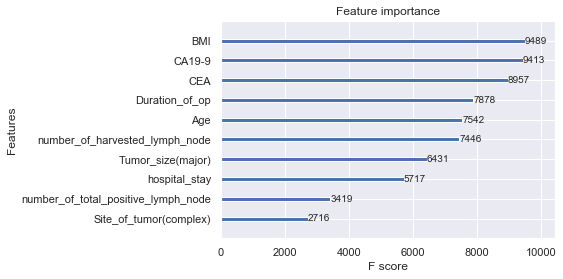

In [17]:
xgboost.plot_importance(xgb_model.model, max_num_features=10) 

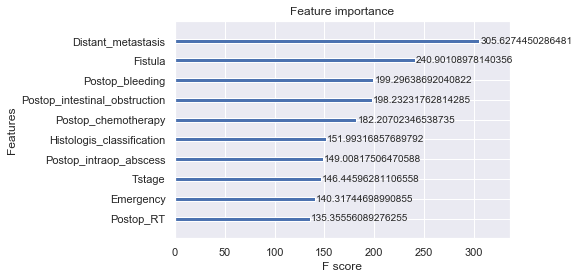

In [18]:
xgboost.plot_importance(xgb_model.model, max_num_features=10, importance_type = 'cover')

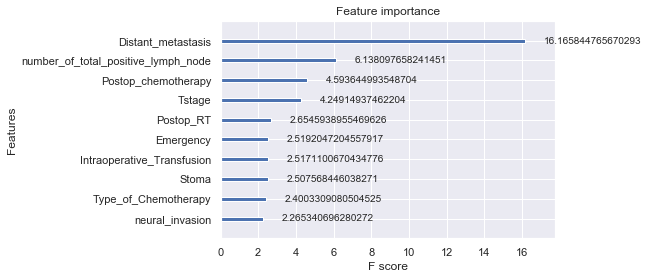

In [19]:
xgboost.plot_importance(xgb_model.model, max_num_features=10, importance_type = 'gain')

In [20]:
# os.environ["PATH"]+=(os.pathsep+'C:/Program Files/Graphviz/bin/')



# rcParams['figure.figsize']=200,300

# plot_tree(xgb_model.model)
# plt.savefig('savefig_default.png')
# plt.show()

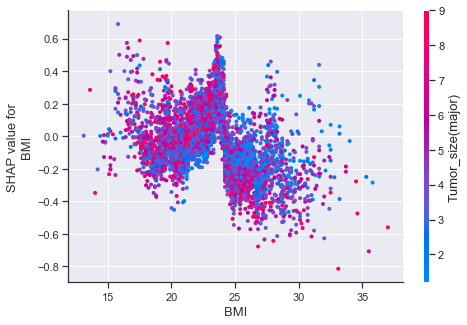

In [21]:
shap.dependence_plot("BMI", shap_values, xgb_model.train_X)

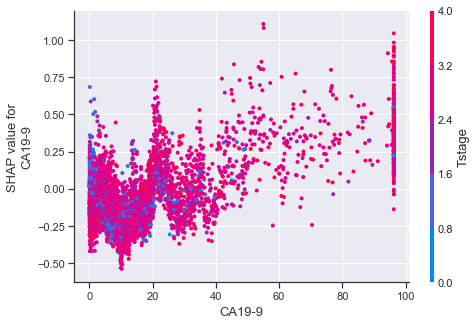

In [22]:
shap.dependence_plot("CA19-9", shap_values, xgb_model.train_X)

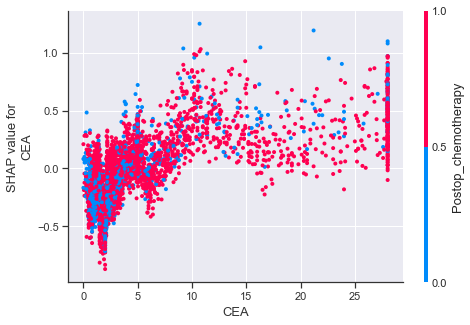

In [23]:
shap.dependence_plot("CEA", shap_values, xgb_model.train_X)

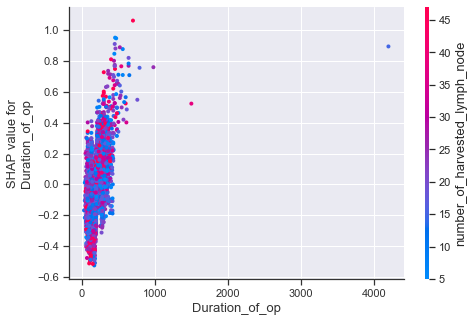

In [24]:
shap.dependence_plot("Duration_of_op", shap_values, xgb_model.train_X)

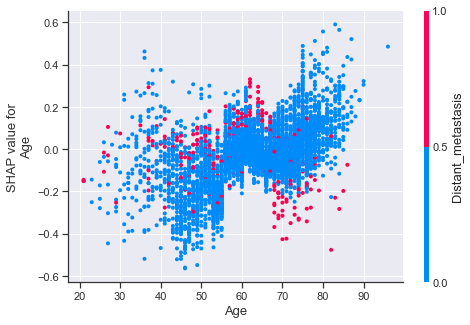

In [25]:
shap.dependence_plot("Age", shap_values, xgb_model.train_X)

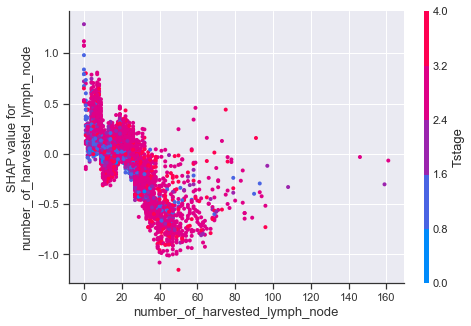

In [26]:
shap.dependence_plot("number_of_harvested_lymph_node", shap_values, xgb_model.train_X)

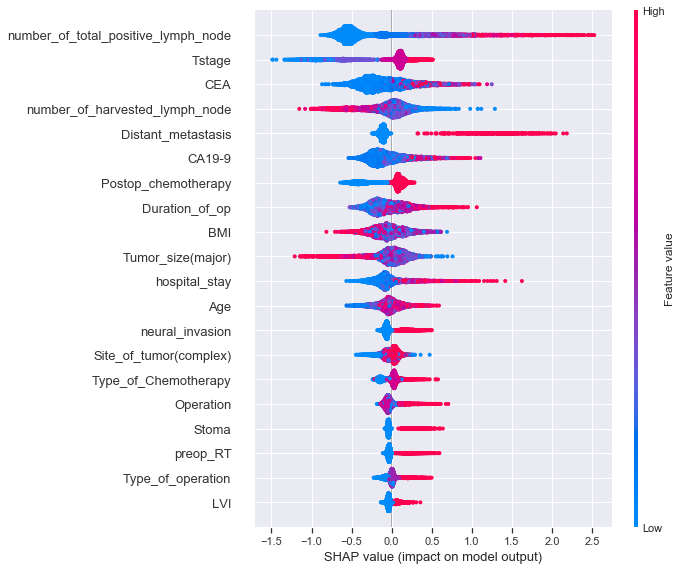

In [27]:
shap.summary_plot(shap_values, xgb_model.train_X)